In [1]:
library('matrixStats')
library('ggplot2')

# Exercise 1:  Bayesian Inference for Poisson model

The number of particles emitted by a radioactive source during a fixed interval of time ($\Delta t = 10$ s) follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3.


(a) assuming a positive uniform prior distribution for the parameter $\mu$
- determine and draw the posterior distribution for μ, given the data
- evaluate mean, median and variance, both analytically and numerically in R


Sample median  4 
Sample mean  2.83 
Sample variance  2.57 

Distribution mean 3 
Distribution variance 0.51 


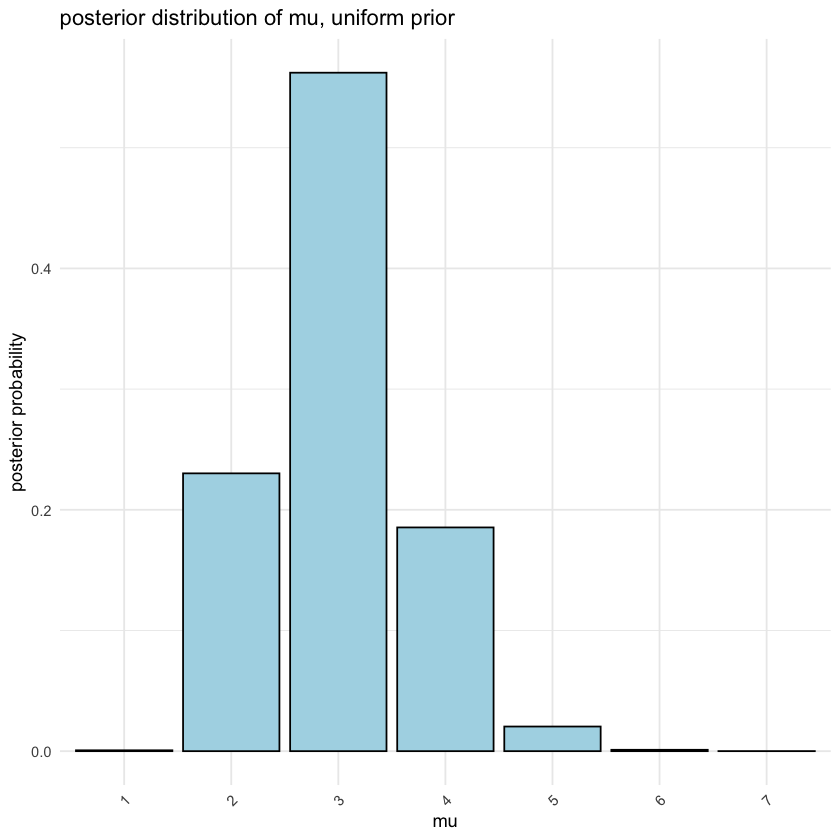

In [2]:
# data and mu sample
obs <- c(4, 1, 3, 1, 5, 3)
mu_val <- seq(1,7,1)

# defining likelihood function
pois_likelihood <- function(x , mu){
   like <- (mu^x * exp(-mu))/factorial(x)
   return(like)
}

# computing likelihood for each mu 
mu_likelihood <- matrix(0, length(mu_val), length(obs))
counter <- 1
for( m in mu_val){
    mu_likelihood[counter,] <- pois_likelihood(obs,m)
    counter <- counter +1
} 
mu_likelihood <- matrix(rowProds(mu_likelihood),nrow = length(mu_val), ncol = 1)

# defining prior and norm for Bayes theorem
prior <- 1
norm_factor <- sum(mu_likelihood)

# computing posterior with Bayes
mu_posterior <- mu_likelihood/norm_factor * prior

# plotting
data <- data.frame(mu = mu_val, Posterior = mu_posterior)
ggplot(data, aes(x = as.factor(mu), y = Posterior, fill = as.factor(mu))) +
  geom_bar(stat = 'identity', color = 'black', show.legend = FALSE, fill = 'light blue') +
  theme_minimal() +
  labs(x = 'mu', y = 'posterior probability', title = 'posterior distribution of mu, uniform prior') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# computing mean and variance
sample_mean <- round(mean(obs),2)
sample_med <- (length(mu_val) + 1 )/2
sample_median <- mu_val[length(mu_val)/2]
sample_var <- round(sd(obs)^2,2)
distribution_mean_uniform_prior <- round(sum(mu_val*mu_posterior),2)
distribution_var_uniform_prior <-  round(sum(((mu_val-distribution_mean_uniform_prior)^2)*mu_posterior),2)

cat(paste(c('Sample median ', sample_med,'\n')))
cat(paste(c('Sample mean ', sample_mean,'\n')))
cat(paste(c('Sample variance ', sample_var ,'\n')))
cat('\n')
cat(paste(c('Distribution mean', distribution_mean_uniform_prior,'\n')))
cat(paste(c('Distribution variance', distribution_var_uniform_prior,'\n')))

(b) assuming a Gamma prior such that the expected value is $\mu$ = 3 with a standard deviation $\sigma$ = 1

- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R.

Sample median  4 
Sample mean  2.83 
Sample variance  2.57 

Distribution mean 2.9 
Distribution variance 0.33 


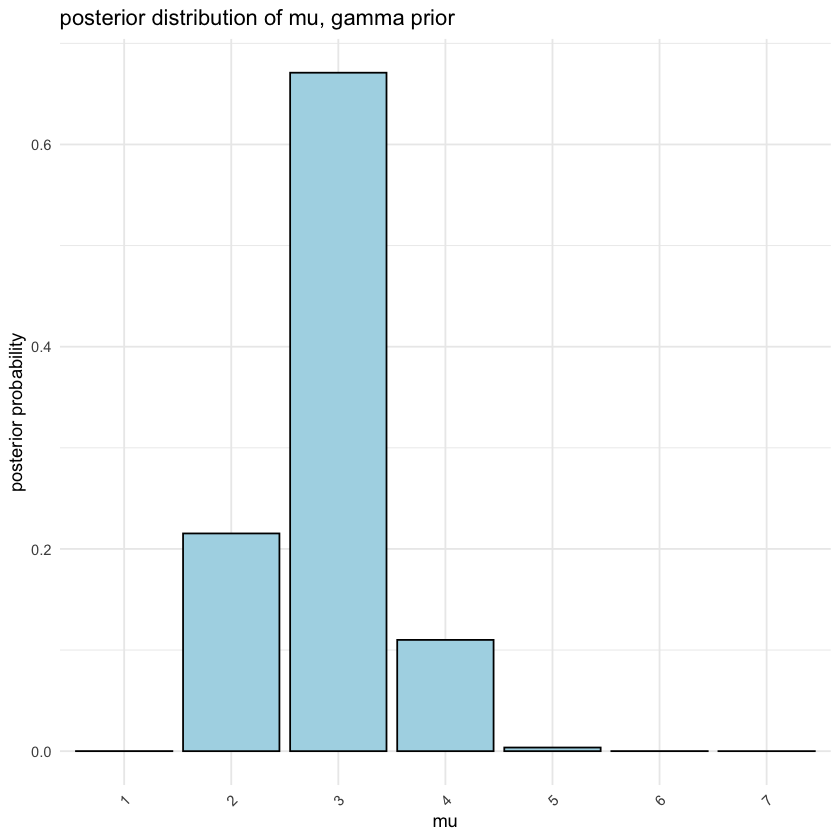

In [3]:
# define parameters for gamma dist
Exp_mu <- 3
sigma <- 1
alpha <- Exp_mu^2 /sigma
lambda <- Exp_mu / sigma

# redefining the prior for mu as a gamma distribution
prior <- dgamma(mu_val, shape = alpha, rate = lambda)

# re normalization
norm_factor <- sum(mu_likelihood * prior)

# computing posterior with the nuew prior 
mu_posterior <- mu_likelihood*prior/norm_factor 

# plotting
data <- data.frame(mu = mu_val, Posterior = mu_posterior)
ggplot(data, aes(x = as.factor(mu), y = Posterior, fill = as.factor(mu))) +
  geom_bar(stat = 'identity', color = 'black', show.legend = FALSE, fill = 'light blue') +
  theme_minimal() +
  labs(x = 'mu', y = 'posterior probability', title = 'posterior distribution of mu, gamma prior') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# computing mean and variance
sample_mean <- round(mean(obs),2)
sample_med <- (length(mu_val) + 1 )/2
sample_median <- mu_val[length(mu_val)/2]
sample_var <- round(sd(obs)^2,2)
distribution_mean_gamma_prior <- round(sum(mu_val*mu_posterior),2)
distribution_var_gamma_prior <-  round(sum(((mu_val-distribution_mean_gamma_prior)^2)*mu_posterior),2)

cat(paste(c('Sample median ', sample_med,'\n')))
cat(paste(c('Sample mean ', sample_mean,'\n')))
cat(paste(c('Sample variance ', sample_var ,'\n')))
cat('\n')
cat(paste(c('Distribution mean', distribution_mean_gamma_prior,'\n')))
cat(paste(c('Distribution variance', distribution_var_gamma_prior,'\n')))

(c) evaluate a 95% credibility interval for the results obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [4]:
lower_credibility_bound <- qpois(0.025, distribution_mean_gamma_prior, distribution_var_gamma_prior)
upper_credibility_bound <- qpois(0.975, distribution_mean_gamma_prior, distribution_var_gamma_prior)
lcb_norm <- qnorm(0.025, distribution_mean_gamma_prior, distribution_var_gamma_prior)
ucb_norm <- qnorm(0.975, distribution_mean_gamma_prior, distribution_var_gamma_prior)
cat( 'credibility interval gamma prior [',lower_credibility_bound,',', upper_credibility_bound, ']\n')
cat( 'credibility interval normal posterior [',lcb_norm,',', ucb_norm, ']\n')
cat('\n')
lower_credibility_bound <- qpois(0.025, distribution_mean_uniform_prior, distribution_var_uniform_prior)
upper_credibility_bound <- qpois(0.975, distribution_mean_uniform_prior, distribution_var_uniform_prior)
lcb_norm <- qnorm(0.025, distribution_mean_uniform_prior, distribution_var_uniform_prior)
ucb_norm <- qnorm(0.975, distribution_mean_uniform_prior, distribution_var_uniform_prior)
cat( 'credibility interval uniform prior [',lower_credibility_bound,',', upper_credibility_bound, ']\n')
cat( 'credibility interval normal posterior [',lcb_norm,',', ucb_norm, ']\n')

credibility interval gamma prior [ 7 , 0 ]
credibility interval normal posterior [ 2.253212 , 3.546788 ]

credibility interval uniform prior [ 7 , 0 ]
credibility interval normal posterior [ 2.000418 , 3.999582 ]


# Exercise 2: Efficiency using Bayesian approach

A researcher A wants to evaluate the efficiency of detector 2 (Det2). For this purpose, he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1 and Det3. Let n be the number of signals recorded simultaneously by Det1 and Det3, and r be those also recorded by Det2, researcher A obtains n = 500 and r = 312.

Assuming a binomial model where n is the number of trials and r is the number of success out of n trials,\
a) Evaluate the mean and the variance using a Bayesian approach under the hypothesis of:


- uniform prior ∼ U(0,1)
- Jeffrey’s prior ∼ Beta(1/2, 1/2)

b) Plot the posterior distributions for both cases:

Mean of the ditstribution 0.6235 
Variance of the distribution 0.0287

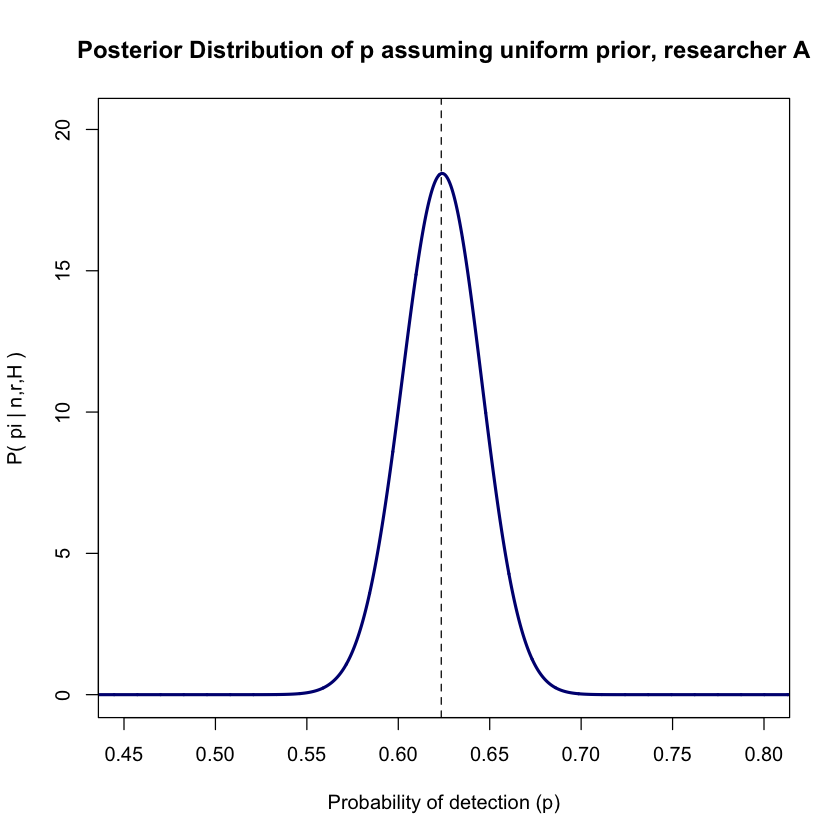

In [5]:
# lets now consider a binomial process where X = 1 if detected and X = 0 if not 
# we want now to use B.T. to build the postirior probability density distribution for this process

# evidence 
n_trials <- 500
r <- 312

# x-axis for the distribution
delta_p <- 0.0001
p <- seq(0.0001, 0.9999, by = delta_p)  

# Uniform prior
uniform_prior <- 1
# Binomial likelihood
likelihood <- dbinom(x = r, size = n_trials, prob = p)
# Normalization factor
norm_factor <- sum(likelihood * uniform_prior) * delta_p
# Posterior distribution
posterior <- (likelihood * uniform_prior) / norm_factor

# mean and variance of distribution
mean_dist <- round(sum(posterior * p ) * delta_p,4)
var_dist <- round(sum((p - mean_dist)^2 *p) * delta_p,4)
# Plotting the posterior distribution
plot(p, posterior,
     type = 'l',                   
     col = 'navy',                 
     lwd = 2.5,                    
     xlab = 'Probability of detection (p)',  
     ylab = 'P( pi | n,r,H )',             
     main = 'Posterior Distribution of p assuming uniform prior, researcher A',   
     ylim = c(0, max(posterior) * 1.1),      
     xlim = c(0.45, 0.8)) 
abline(v = mean_dist, lty = 2)

cat('Mean of the ditstribution', mean_dist, '\n')
cat('Variance of the distribution', var_dist)
   

Mean of the ditstribution 0.6238 
Variance of the distribution 0.0287

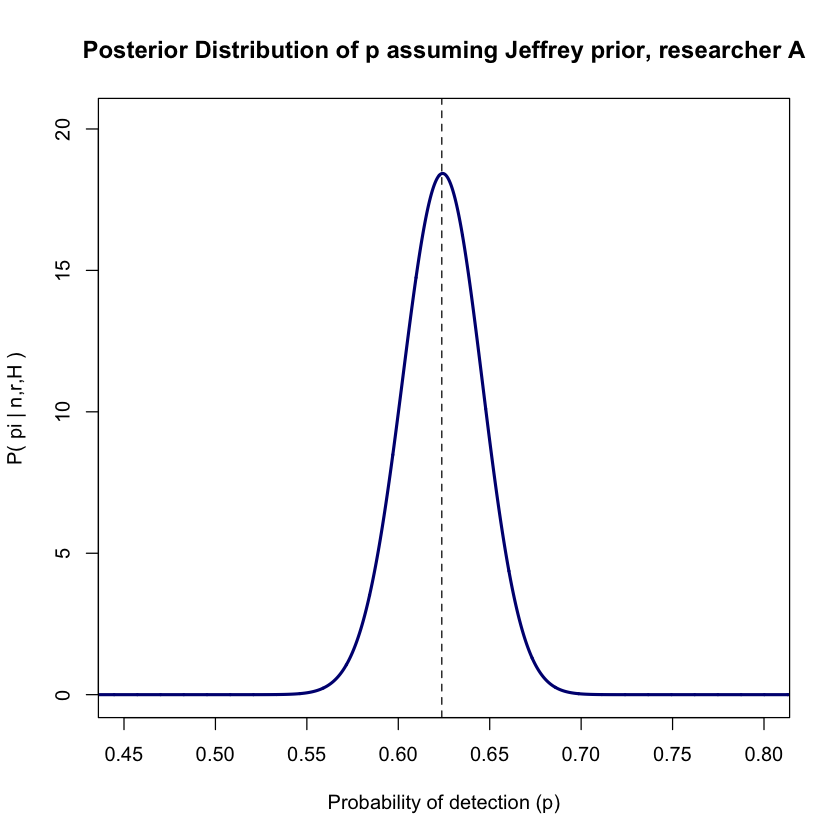

In [6]:
# now same but changing the brior with a beta dist
# Jeffrey’s prior
beta_prior <- dbeta(p , 1/2, 1/2)
norm_factor <- sum(likelihood * beta_prior) * delta_p
posterior <- (likelihood * beta_prior) / norm_factor

mean_dist <- round(sum(posterior * p ) * delta_p,4)
var_dist <- round(sum((p - mean_dist)^2 *p) * delta_p,4)

plot(p, posterior,
     type = 'l',                   
     col = 'navy',                 
     lwd = 2.5,                    
     xlab = 'Probability of detection (p)',  
     ylab = 'P( pi | n,r,H )',             
     main = 'Posterior Distribution of p assuming Jeffrey prior, researcher A',   
     ylim = c(0, max(posterior) * 1.1),      
     xlim = c(0.45, 0.8)) 
abline(v = mean_dist, lty = 2)

cat('Mean of the ditstribution', mean_dist, '\n')
cat('Variance of the distribution', var_dist)

Taking into account that the same detector has been studied by researcher B, who has
performed only n = 10 measurements and has obtained r = 10 signals,

c) Evaluate the mean, the variance and the posterior distribution using a uniform prior
with the results of researcher B.


Mean of the ditstribution 0.9166 
Variance of the distribution 0.059

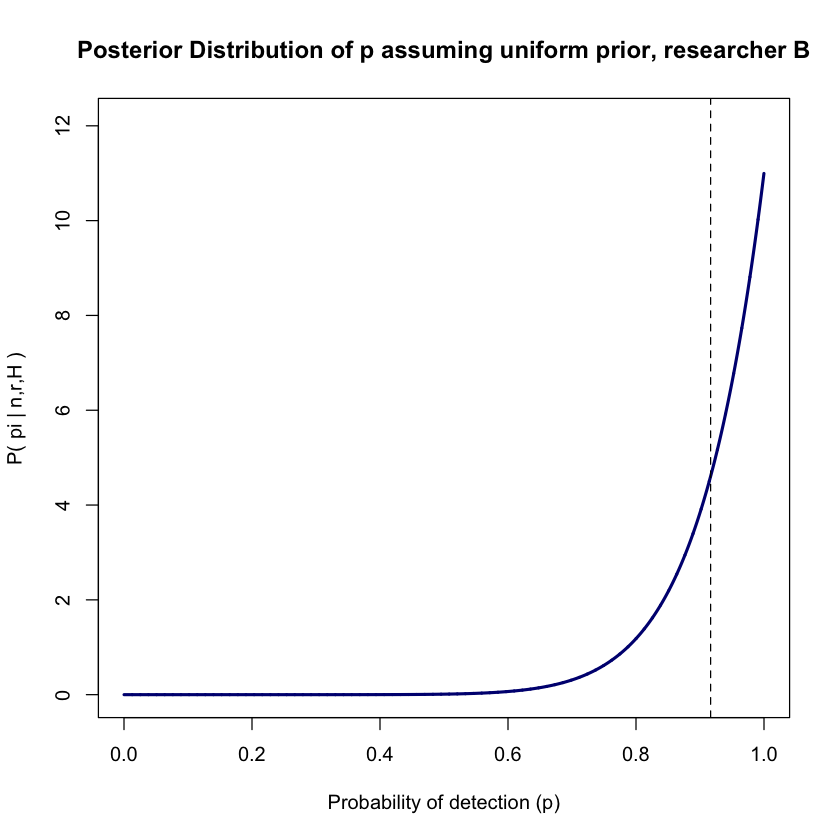

In [7]:
# new evidence 
n_trials <- 10
r <- 10
 
uniform_prior <- 1
likelihood <- dbinom(x = r, size = n_trials, prob = p)
norm_factor <- sum(likelihood * uniform_prior) * delta_p
posterior_B <- (likelihood * uniform_prior) / norm_factor

# mean and variance of distribution
mean_dist <- round(sum(posterior_B * p ) * delta_p,4)
var_dist <- round(sum((p - mean_dist)^2 *p) * delta_p,4)

plot(p, posterior_B,
     type = 'l',                   
     col = 'navy',                 
     lwd = 2.5,                    
     xlab = 'Probability of detection (p)',  
     ylab = 'P( pi | n,r,H )',             
     main = 'Posterior Distribution of p assuming uniform prior, researcher B',   
     ylim = c(0, max(posterior_B) * 1.1),      
     xlim = c(0, 1)) 
abline(v = mean_dist, lty = 2)

cat('Mean of the ditstribution', mean_dist, '\n')
cat('Variance of the distribution', var_dist)
   

d) Repeat the computation of points a) and b) with the data of researcher A using as a
prior the posterior obtained from point c).

Mean of the ditstribution 0.6309 


Variance of the distribution 0.0284

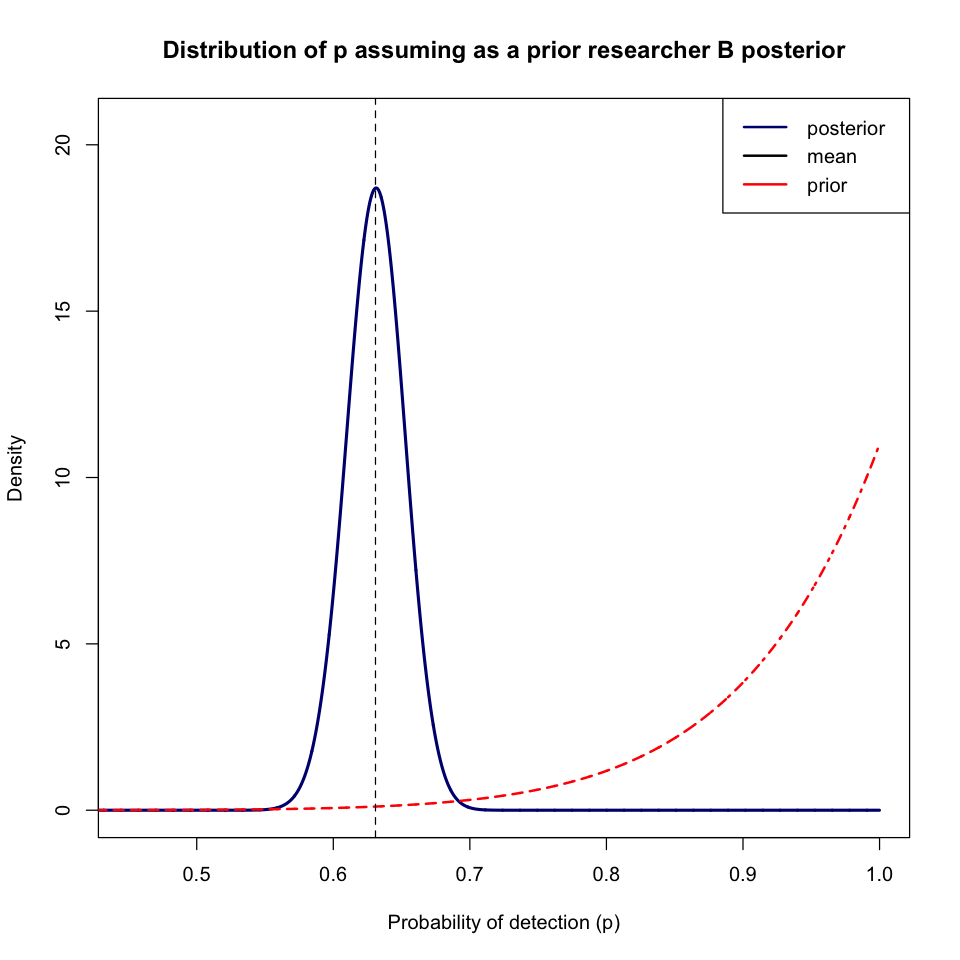

In [8]:
# lets now consider a binomial process where X = 1 if detected and X = 0 if not 
# we want now to use B.T. to build the postirior probability density distribution for this process

# old evidence 
n_trials <- 500
r <- 312

# new prior as the resercher B posterior
composed_prior <- posterior_B
likelihood <- dbinom(x = r, size = n_trials, prob = p)
norm_factor <- sum(likelihood * composed_prior) * delta_p
posterior <- (likelihood * composed_prior) / norm_factor

mean_dist <- round(sum(posterior * p ) * delta_p,4)
var_dist <- round(sum((p - mean_dist)^2 *p) * delta_p,4)

options(repr.plot.width = 8, repr.plot.height = 8)
plot(p, posterior,
     type = 'l',                   
     col = 'navy',                 
     lwd = 2.5,                    
     xlab = "Probability of detection (p)",  
     ylab = "Density",             
     main = "Distribution of p assuming as a prior researcher B posterior",   
     ylim = c(0, max(posterior) * 1.1),      
     xlim = c(0.45, 1)) 
lines(p, posterior_B, lwd = 2, lty = 4, col = 'red')
abline(v = mean_dist, lty = 2)

cat('Mean of the ditstribution', mean_dist, '\n')
cat('Variance of the distribution', var_dist)
legend('topright', legend = c('posterior', 'mean', 'prior'), col = c('Navy', 'black', 'red'), lwd = 2, lty = 1)



e) [Optional] Compute 95% credible interval using the posterior of the previous point d).

95% credibility interval [ 0.5885 , 0.672 ]

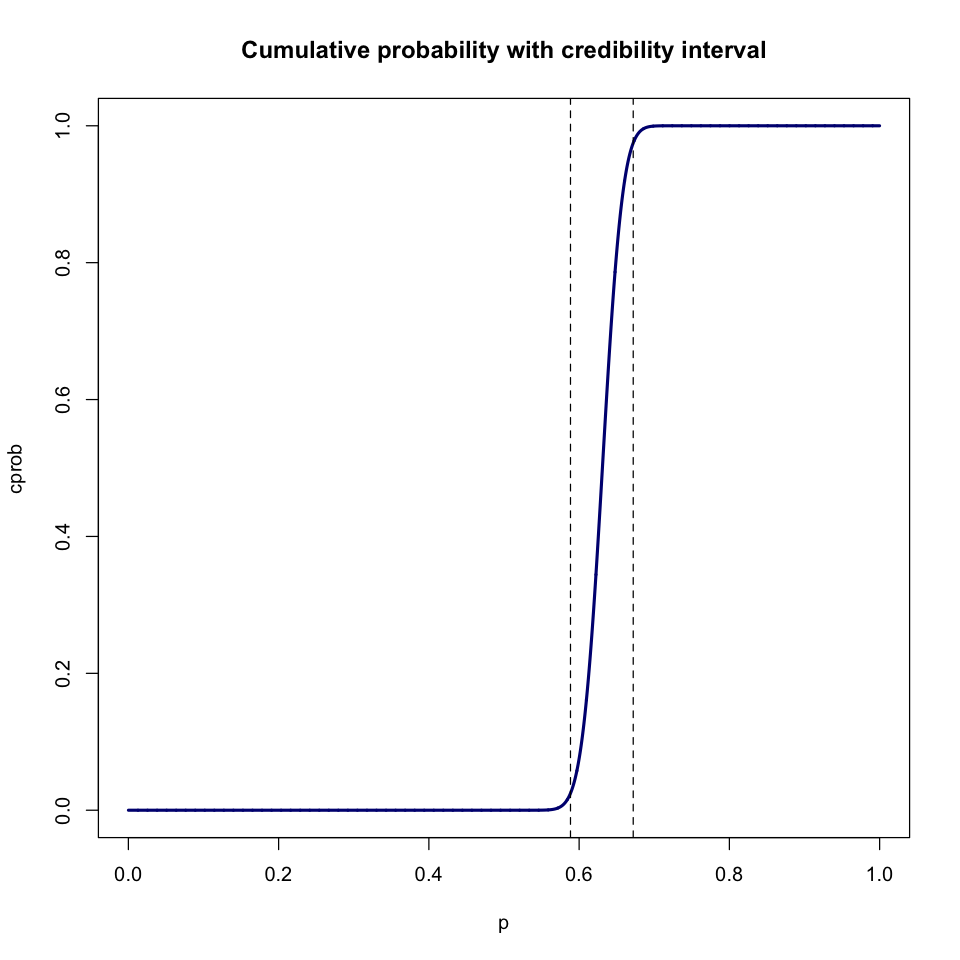

In [9]:
cprob <- cumsum(posterior)*delta_p
lb <- cprob[cprob<0.025]
ub <- cprob[cprob<0.975]
cat('95% credibility interval [', p[length(lb)], ',', p[length(ub)], ']')
plot(p ,cprob, type = 'l', lwd = 2.5, main = 'Cumulative probability with credibility interval', col = 'navy')
abline(v = p[length(lb)], lty = 2)
abline(v = p[length(ub)], lty = 2)



# Exercise 3: Bayesian Inference for Binomial model


A coin is flipped n = 30 times with the following outcomes:\
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H,
T, H, T, H, H, H

a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

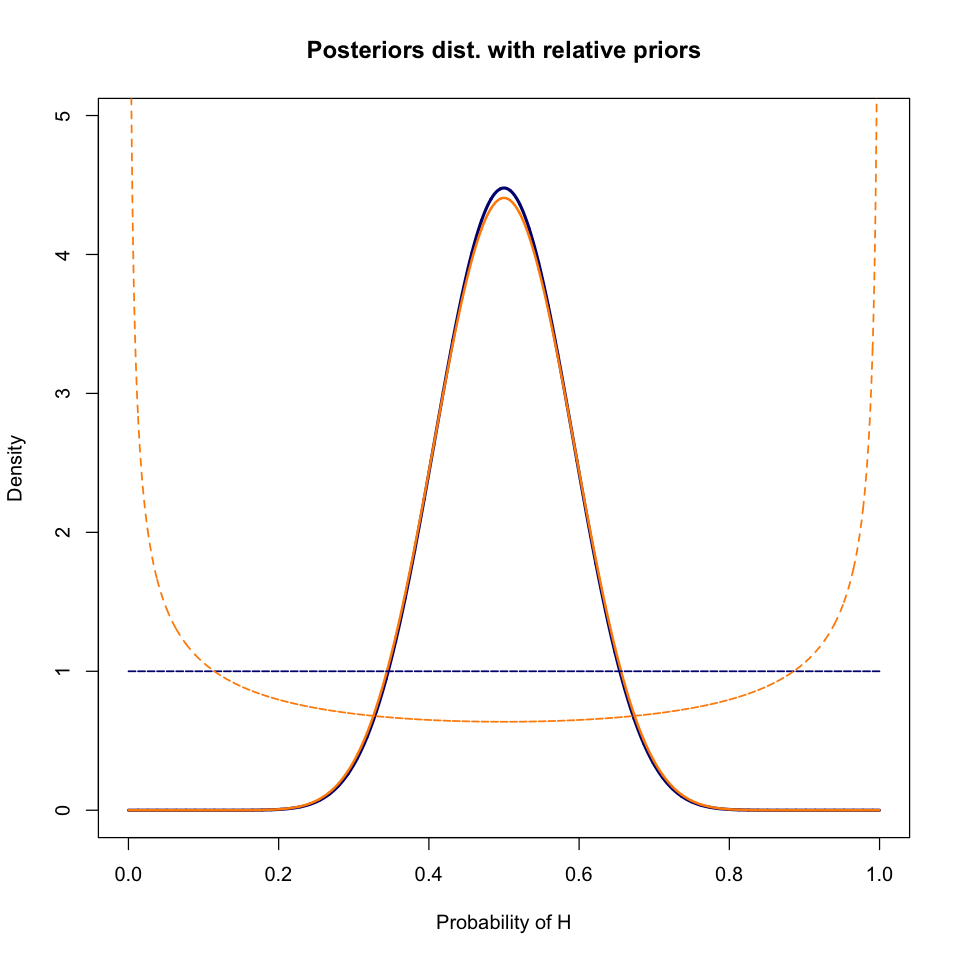

In [40]:
# lets conider H = 1 
H = 1
T = 0
toss <- c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H)

n = length(toss)
r = sum(toss)

# priors
uniform_prior <- rep(1, length(p))
beta_prior <- dbeta(p , 1/2, 1/2)

# likelihood
likelihood <- dbinom(x = r, size = n, prob = p)

# norm factors
norm_factor_uniform <- sum(likelihood * uniform_prior) * delta_p
norm_factor_beta <- sum(likelihood * beta_prior) * delta_p

# posteriors
uposterior <- (likelihood * uniform_prior) / norm_factor_uniform
bposterior <- (likelihood * beta_prior) / norm_factor_beta

# plot
plot(p, uposterior,
     type = 'l',                   
     col = 'navy',                 
     lwd = 2.5,                    
     xlab = "Probability of H",  
     ylab = "Density",             
     main = "Posteriors dist. with relative priors",   
     ylim = c(0,  max(uposterior) * 1.1),      
     xlim = c(0, 1)) 
lines(p, bposterior, lwd = 2, lty = 1, col = 'dark orange')
lines(p, uniform_prior, lwd = 1.4, lty = 2, col = 'navy')
lines(p, beta_prior, lwd = 1.4, lty = 2, col = 'dark orange')



b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [48]:
most_prob_p <- p[which.max(bposterior)]
mean_dist <- round(sum(uposterior * p ) * delta_p,4)

cat('Most probable p:', most_prob_p, '\n')
cat('Mean of the distribution:', mean_dist, '\n')

cprob <- cumsum(bposterior)*delta_p
lb <- cprob[cprob<0.025]
ub <- cprob[cprob<0.975]
cat('95% credibility interval [', p[length(lb)], ',', p[length(ub)], ']')

Most probable p: 0.5 
Mean of the distribution: 0.5 
95% credibility interval [ 0.3279 , 0.6719 ]

c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

In [63]:
toss <- c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H)

fmop <- c()
fmean <- c()
fn <- c()
fr <- c()
fub <- c()
flb <- c()

    

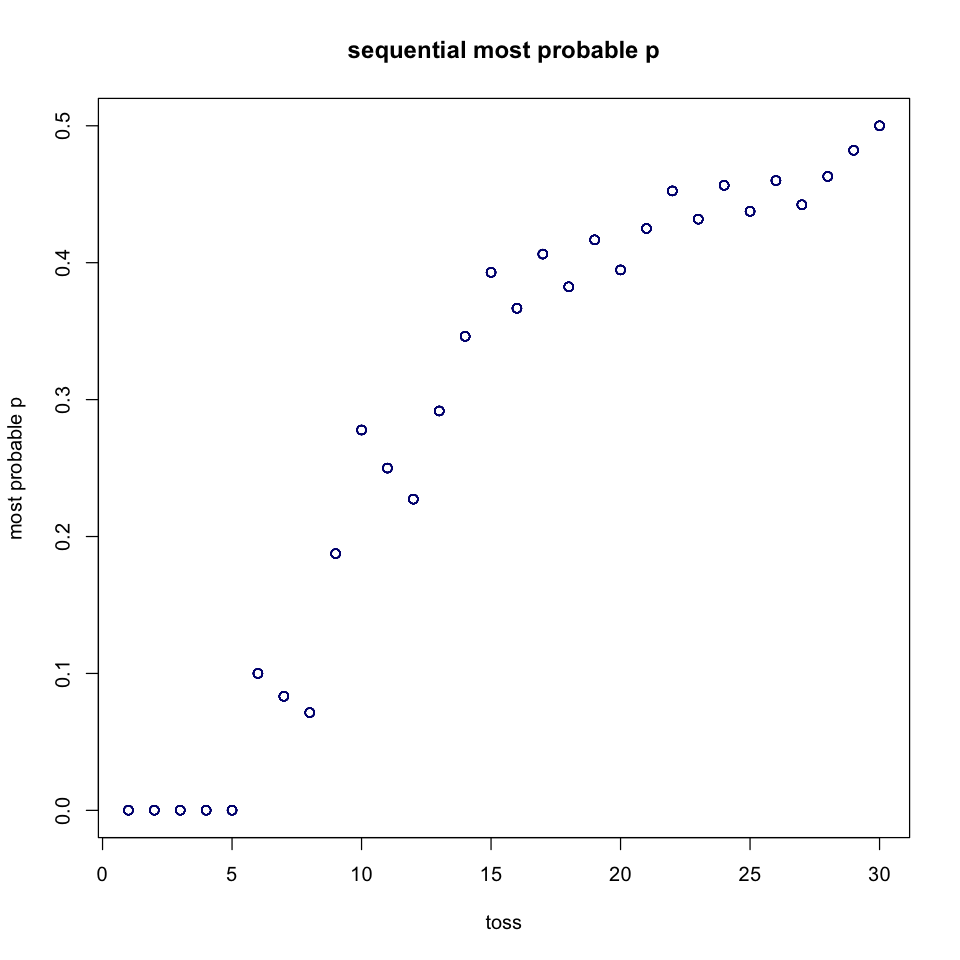

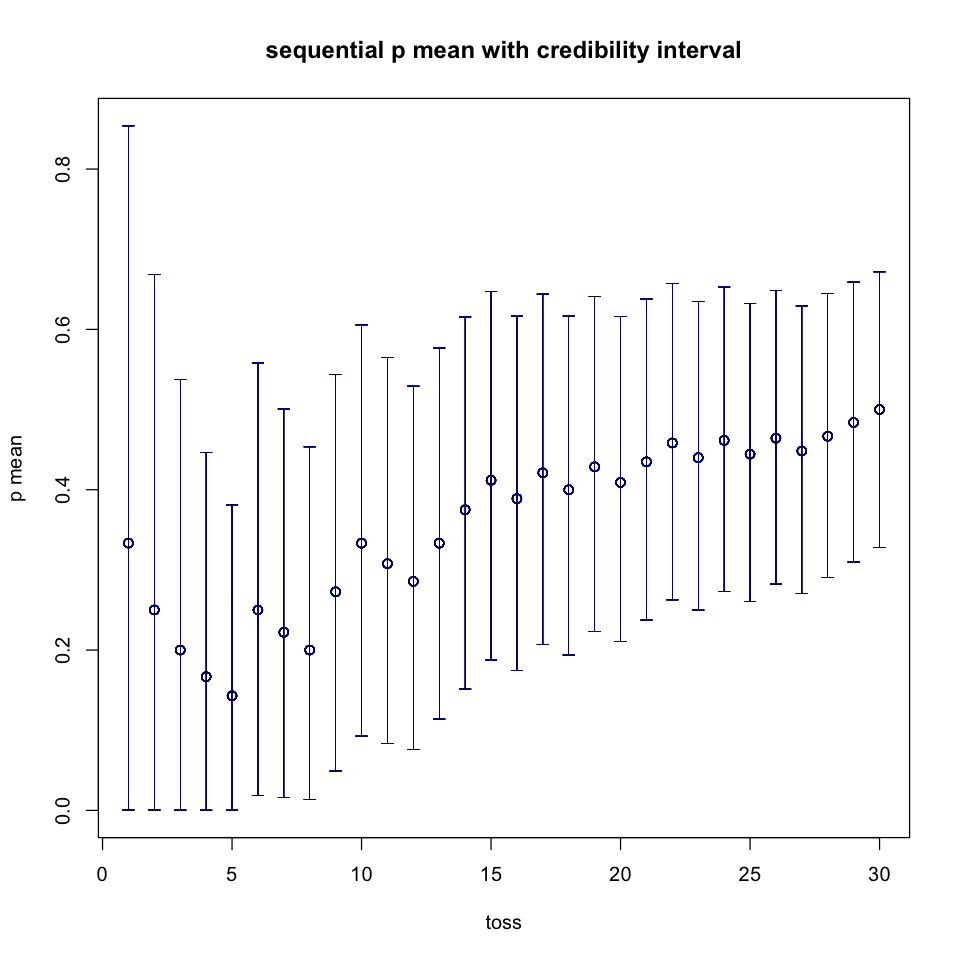

In [82]:
for(i in 1:30){
    ftoss = toss[1:i]
    n = length(ftoss) 
    r = sum(ftoss)

    # likelihood
    likelihood <- dbinom(x = r, size = n, prob = p)

    # norm factors
    norm_factor_uniform <- sum(likelihood * uniform_prior) * delta_p
    norm_factor_beta <- sum(likelihood * beta_prior) * delta_p

    # posteriors
    uposterior <- (likelihood * uniform_prior) / norm_factor_uniform
    bposterior <- (likelihood * beta_prior) / norm_factor_beta

    most_prob_p <- p[which.max(bposterior)]
    mean_dist <- round(sum(uposterior * p ) * delta_p,4)

    cprob <- cumsum(bposterior)*delta_p
    lb <- p[length(cprob[cprob<0.025])]
    ub <- p[length(cprob[cprob<0.975])]

    fmop  <- c(fmop, most_prob_p)
    fmean <- c(fmean, mean_dist)
    fn    <- c(fn,n)
    fr    <- c(fr,r)
    fub   <- c(fub, ub)
    flb   <- c(flb, lb)
}

plot(fn, 
    fmop,
    xlab = 'toss',
    ylab = 'most probable p',
    main = 'sequential most probable p',
    col = 'navy')

plot(fn, 
    fmean,
    ylim = c(min(flb), max(fub)), # Ajust the y limits to include error bars
    xlab = 'toss',
    ylab = 'p mean',
    main = 'sequential p mean with credibility interval',
    col = 'navy') 

# Adding error bars
arrows(x0 = fn, y0 = flb, x1 = fn, y1 = fub, angle = 90, code = 3, length = 0.05, col = 'navy', lwd =0.4)



d) Do you get a different result, by analysing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

The most probable p and mean are different depending on the bayesian inference, both as expected tend to 0.5. Credibility interval decrease as the number of toss increase.

# Exercise 4: Poll

A couple of days before an election in which four parties (A,B,C,D) compete, a poll is taken using a sample of 200 voters who express the following preferences 57, 31,45 and 67 for, respectively, parties A,B,C and D.\
Using a Bayesian approach, for all parties

Calculate the expected percentage of votes and a 68% credibility interval by assuming as prior a

- uniform prior
- a prior constructed from the results obtained from another poll conducted the previous week on a sample of 100 voters who expressed the following preferences 32,14,26,28 for, respectively, parties A,B,C and D.

In [85]:
total <- 200
A_votes <- 57
B_votes <- 31
C_votes <- 45
D_votes <- 67

# prior
uniform_prior <- rep(1,length(p))

# we can compute the posterior as a beta distribution
Aposterior <- pbeta(p, 1 + 57, 1 + 200)
Aposterior <- pbeta(p, 1 + 31, 1 + 200)
Aposterior <- pbeta(p, 1 + 45, 1 + 200)
Aposterior <- pbeta(p, 1 + 67, 1 + 200)



Sample size to obtain a margin of error less or equal than $\pm3$% for each party